## Venues Data Analysis of Two Fastest Developing Cities in Turkey

To start our analysis, first we need to import libraries that we are going to use in the project.

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import matplotlib.pyplot as plt #library for plotting charts

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('All Libs are downloaded.')

     |████████████████████████████████| 79 kB 9.9 MB/s  eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=3c05045bba63d75fd4fec34f02717751586a1491f7d8ddf32d52fc421f8eaae9
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium
All Libs are downloaded.


Now we have downloaded necessary libraries, we can find the coordinates of both cities via Python GeoPy.GeoCode library. Just typing the names of the cities, below codes return the coordinates with quite little error. 

In [2]:
manisa = 'Manisa, Yunusemre/Manisa, TR' #Should be close to the points 38.614147,27.3595218 (checked from Google Maps)
man_locator = Nominatim(user_agent="manisa_agent")
loc_manisa = man_locator.geocode(manisa)
manisa_lat = loc_manisa.latitude
manisa_long = loc_manisa.longitude
print('Coordinates of Manisa City Center is (Lat, Long):',manisa_lat, manisa_long)

Coordinates of Manisa City Center is (Lat, Long): 38.6155178 27.4045498


In [3]:
gaziantep = 'Gaziantep, TR' #Should be close the points 37.0629589,37.3787449 (checked from Google Maps)
gzt_locator = Nominatim(user_agent="gantep_agent")
loc_gantep = gzt_locator.geocode(gaziantep)
#print(loc_gantep)
gantep_lat = loc_gantep.latitude
gantep_long = loc_gantep.longitude
print('Coordinates of Gaziantep City Center is (Lat, Long):',gantep_lat, gantep_long)

Coordinates of Gaziantep City Center is (Lat, Long): 37.0611756 37.3793085


After getting the city center coordinates, below we define our credentials to use Four-Square API. (Note: values will be removed later on)

In [4]:
CLIENT_ID = '1V5SIYNOFJ4AHPJXMJHLA2HOIRONZWMV3GGFUL24LDMHL3HT' # my Foursquare ID
CLIENT_SECRET = 'X5MFOD5GHA42LZ2QTLSA1UY5PMCEVQZV3RLSZ31HTDX2GMZI' # my Foursquare Secret
ACCESS_TOKEN = 'DQPFGS4GITUZCAUNUW2AIMRFPQRY0IK2NB3H0KNYQGZ2RNKE' # my FourSquare Access Token
VERSION = '20180604'
radius=2000
limit=200

With Four-Square API calls, we acquire venues within the 2000 meters radius from the center coordinates. The reason why we use a big radius is not to miss any venue, as they form our data set. Below returned venue counts for each city.

In [5]:
manisa_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, manisa_lat, manisa_long, ACCESS_TOKEN, VERSION, radius, limit)
man_results = requests.get(manisa_url).json()
print(len(man_results['response']['venues']),'venues returned for Manisa')

121 venues returned for Manisa


In [6]:
gantep_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, gantep_lat, gantep_long, ACCESS_TOKEN, VERSION, radius, limit)
gzt_results = requests.get(gantep_url).json()
print(len(gzt_results['response']['venues']),'venues returned for Gaziantep')

129 venues returned for Gaziantep


After we retrieve venues from Four-Square, we try to use json_normalize method(function) to structure our data. But somehow, it returns an error at the 11th row (data element). For that reason, we need to examine closely our data elements and their structure as below.  

In [7]:
# assign relevant part of JSON to venues
man_venues = man_results['response']['venues']
man_venues[0] #Let's see the first element of man_venues to see key-value pairs

{'id': '4c9af898eaa5a143c409d1e4',
 'name': 'Merkez Efendi Devlet Hastanesi',
 'location': {'address': 'Merkez Efendi Mh. 45020 Manisa, Türkiye',
  'lat': 38.61587901620142,
  'lng': 27.408422220395153,
  'distance': 339,
  'cc': 'TR',
  'city': 'Manisa',
  'state': 'Manisa',
  'country': 'Türkiye',
  'formattedAddress': ['Merkez Efendi Mh. 45020 Manisa, Türkiye',
   'Manisa',
   'Türkiye']},
 'categories': [{'id': '4bf58dd8d48988d196941735',
   'name': 'Hospital',
   'pluralName': 'Hospitals',
   'shortName': 'Hospital',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
    'suffix': '.png'},
   'primary': True}],
 'referralId': 'v-1615756392',
 'hasPerk': False}

In [8]:
# assign relevant part of JSON to venues
gzt_venues = gzt_results['response']['venues']
gzt_venues[0] #Let's see the first element of gzt_venues to see key-value pairs

{'id': '4e01e307c65b896d116ec9b6',
 'name': 'Gaziantep Çarşı',
 'location': {'address': 'İl Merkezi',
  'lat': 37.06257661361256,
  'lng': 37.37818751972021,
  'labeledLatLngs': [{'label': 'display',
    'lat': 37.06257661361256,
    'lng': 37.37818751972021}],
  'distance': 185,
  'postalCode': '27400',
  'cc': 'TR',
  'city': 'Gaziantep',
  'state': 'Gaziantep',
  'country': 'Türkiye',
  'formattedAddress': ['İl Merkezi', '27400 Gaziantep', 'Türkiye']},
 'categories': [{'id': '4bf58dd8d48988d162941735',
   'name': 'Other Great Outdoors',
   'pluralName': 'Other Great Outdoors',
   'shortName': 'Other Outdoors',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/outdoors_',
    'suffix': '.png'},
   'primary': True}],
 'referralId': 'v-1615756396',
 'hasPerk': False}

After examining closely and tracing back to error, we notice that json_normalize does not work because some address keys has no address values. To handle this problem, we adopt try-except approach and assign 'pass' values to address keys which has no values. Not to get an error, we extend try-catch to all columns. 

In [9]:
#Let's create a dataframe for Manisa city and assign relevant values from the JSON.
manisa_df=pd.DataFrame(columns=['name', 'address', 'latitude', 'longitude', 'category_name', 'venue_category'])
name=None
adres=None
latitude=None
longitude=None
cat_name=None
category=None
#Now we can fill the dataframe with corresponding values from the JSON.
for i in range(len(man_venues)): 
    try: name = man_venues[i]['name']
    except: name = 'pass'
    try: adres = man_venues[i]['location']['address']
    except: adres = 'pass'
    try: latitude = man_venues[i]['location']['lat']
    except: latitude = None
    try: longitude = man_venues[i]['location']['lng']
    except: longitude = None
    try: cat_name = man_venues[i]['categories'][0]['name']
    except: cat_name = 'pass'
    #To pull the category word alone, we need to do some split operations as below.
    try :
        cat_list = man_venues[i]['categories'][0]['icon']['prefix'].split('/')
    except:
        cat_list = 'pass'
    cat_word = cat_list[len(cat_list)-1]
    category = cat_word.replace('_','')
    #Now we can fill the dataframe columns with corresponding values.
    manisa_df = manisa_df.append({'name':name, 'address':adres, 'latitude':latitude, 'longitude':longitude, 
                                  'category_name':cat_name, 'venue_category':category}, ignore_index = True)
manisa_df.head()    

,name,address,latitude,longitude,category_name,venue_category
0,Merkez Efendi Devlet Hastanesi,"Merkez Efendi Mh. 45020 Manisa, Türkiye",38.615879,27.408422,Hospital,medical
1,Manisa Meteoroloji İl Müdürlüğü,pass,38.615385,27.404768,Spiritual Center,religious
2,Lale Meydanı,pass,38.617454,27.402748,Plaza,plaza
3,Forum Magnesia,Laleli Mah. Ali Rıza Efendi Cad. No:4,38.616166,27.400331,Shopping Mall,mall
4,Yunusemre Belediyesi,Yunusemre,38.614899,27.402903,City Hall,cityhall


Outcome for the Manisa City is as above. Same approach is adopted for Gaziantep City and outcome is seen below.

In [10]:
#Now create a dataframe for Gaziantep city and assign relevant values from the JSON.
gantep_df=pd.DataFrame(columns=['name', 'address', 'latitude', 'longitude', 'category_name', 'venue_category'])
name=None
adres=None
latitude=None
longitude=None
cat_name=None
category=None
#Now we can fill the dataframe with corresponding values from the JSON.
for i in range(len(gzt_venues)):
    try: name = gzt_venues[i]['name']
    except: name = 'pass'
    try: adres = gzt_venues[i]['location']['address']
    except: adres = 'pass'
    try: latitude = gzt_venues[i]['location']['lat']
    except: latitude = None
    try: longitude = gzt_venues[i]['location']['lng']
    except: longitude = None
    try: cat_name = gzt_venues[i]['categories'][0]['name']
    except: cat_name = 'pass'
    #To pull the category word alone, we need to do some split operations as below.
    try :
        cat_list = gzt_venues[i]['categories'][0]['icon']['prefix'].split('/')
    except:
        cat_list = 'pass'
    cat_word = cat_list[len(cat_list)-1]
    category = cat_word.replace('_','')
    #Now we can fill the dataframe columns with corresponding values.
    gantep_df = gantep_df.append({'name':name, 'address':adres, 'latitude':latitude, 'longitude':longitude, 
                                  'category_name':cat_name, 'venue_category':category}, ignore_index = True)
gantep_df.head() 

,name,address,latitude,longitude,category_name,venue_category
0,Gaziantep Çarşı,İl Merkezi,37.062577,37.378188,Other Great Outdoors,outdoors
1,Adıbelli Market,pass,37.060989,37.379340,Convenience Store,conveniencestore
2,57 NOLU TÜRK TELEKOM BAYİ,EYÜPOGLU MAH,37.061331,37.379387,Business Service,default
3,Kent Otomotiv & Otopark,pass,37.061106,37.379148,Parking,parking
4,Kent Oto Galeri Ve Otopark,pass,37.061146,37.379220,Coworking Space,officecoworkingspace


Recalling that Four-Square API calls returned 121 venues for Manisa City and 129 venues for Gaziantep City. To check if we lost any data while structuring our data, below codes are executed. Result: No Lost Data.

In [11]:
manisa_df.shape

(121, 6)

In [12]:
gantep_df.shape

(129, 6)

In order to find most common venues for both cities, 'groupby' method is applied and results are as shown below.

In [13]:
cat_groups=manisa_df.groupby('category_name').count()
cat_sorted=cat_groups.sort_values(by=['name'], ascending=False)
cat_sorted.head(21)

,name,address,latitude,longitude,venue_category
category_name,,,,,
Residential Building (Apartment / Condo),8,8,8,8,8
Office,8,8,8,8,8
Hospital,6,6,6,6,6
Moving Target,5,5,5,5,5
Café,5,5,5,5,5
Bank,4,4,4,4,4
Building,4,4,4,4,4
Coworking Space,4,4,4,4,4
Business Center,3,3,3,3,3


Results can be expressed as bar charts via MatPlotLib.PyPlot library as shown below.

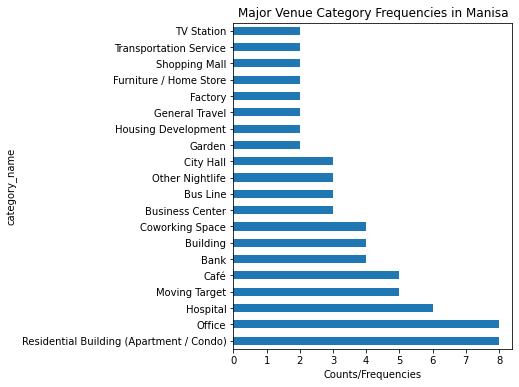

In [14]:
cat_sorted['venue_category'][0:20].plot(kind='barh',figsize=(5,6))
plt.title('Major Venue Category Frequencies in Manisa')
plt.xlabel('Counts/Frequencies')
plt.show()

From the chart above, it is observed that most common venues in Manisa City are Offices and Apartments/Condos. 

Same is done for the Gaziantep city.

In [15]:
cat1_groups=gantep_df.groupby('category_name').count()
cat1_sorted=cat1_groups.sort_values(by=['name'], ascending=False)
cat1_sorted.head(29)

,name,address,latitude,longitude,venue_category
category_name,,,,,
Office,6,6,6,6,6
Coworking Space,5,5,5,5,5
Business Service,4,4,4,4,4
Building,4,4,4,4,4
Shopping Mall,3,3,3,3,3
Business Center,3,3,3,3,3
Electronics Store,3,3,3,3,3
Dentist's Office,3,3,3,3,3
Convenience Store,3,3,3,3,3


Results are plotted in same way but with a different color.

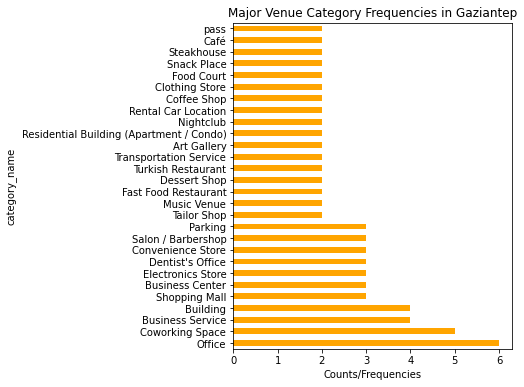

In [16]:
cat1_sorted['venue_category'][0:28].plot(kind='barh',color='orange',figsize=(5,6))
plt.title('Major Venue Category Frequencies in Gaziantep')
plt.xlabel('Counts/Frequencies')
plt.show()

From the chart above, it is observed that most common venue for Gaziantep City is Office. However, second and third rows also represent business venues.

## Visualization of Results

Venues returned for both cities can be plotted on a map by using Folium Map.

In [17]:
map_manisa = folium.Map(location=[manisa_lat, manisa_long], zoom_start=14)

In [18]:
for lat, lng, name, category in zip(manisa_df['latitude'], manisa_df['longitude'], manisa_df['name'], manisa_df['category_name']):
    label = '{}, {}'.format(name, category)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manisa)
map_manisa

From the Manisa City map above, it is obvious that most venues are clustered closely independent of their venue category. Recalling that there are 121 venues for this city, only 7-8 of them are not in the cluster. For that reason, K-Means clustering which is one of the most common clustering algorithms can not be applied here.

Now, Let's visualize venues of Gaziantep City.

In [19]:
map_gantep = folium.Map(location=[gantep_lat, gantep_long], zoom_start=13)

In [20]:
for lat, lng, name, category in zip(gantep_df['latitude'], gantep_df['longitude'], gantep_df['name'], gantep_df['category_name']):
    label = '{}, {}'.format(name, category)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_gantep)
map_gantep

Now for the Gaziantep City map above, there seems to be only around 10 venues separated from the cluster. Recalling that there 129 venues in this city, again, K-Means clustering would not work as desired here, too. Grouping the venues by their category, however, may result in crowded venue category groups that would help us to carry out our analysis.

To create Category Groups, first we need to add columns to our data frames. Columns with names 'category_gr' & 'category_gr_num' are added as seen below.

In [21]:
for i in manisa_df['name'].index:
    manisa_df['category_gr']=None
    manisa_df['category_gr_num']=None
manisa_df.head()

,name,address,latitude,longitude,category_name,venue_category,category_gr,category_gr_num
0,Merkez Efendi Devlet Hastanesi,"Merkez Efendi Mh. 45020 Manisa, Türkiye",38.615879,27.408422,Hospital,medical,None,None
1,Manisa Meteoroloji İl Müdürlüğü,pass,38.615385,27.404768,Spiritual Center,religious,None,None
2,Lale Meydanı,pass,38.617454,27.402748,Plaza,plaza,None,None
3,Forum Magnesia,Laleli Mah. Ali Rıza Efendi Cad. No:4,38.616166,27.400331,Shopping Mall,mall,None,None
4,Yunusemre Belediyesi,Yunusemre,38.614899,27.402903,City Hall,cityhall,None,None


In [22]:
for i in gantep_df['name'].index:
    gantep_df['category_gr']=None
    gantep_df['category_gr_num']=None
gantep_df.head()

,name,address,latitude,longitude,category_name,venue_category,category_gr,category_gr_num
0,Gaziantep Çarşı,İl Merkezi,37.062577,37.378188,Other Great Outdoors,outdoors,None,None
1,Adıbelli Market,pass,37.060989,37.379340,Convenience Store,conveniencestore,None,None
2,57 NOLU TÜRK TELEKOM BAYİ,EYÜPOGLU MAH,37.061331,37.379387,Business Service,default,None,None
3,Kent Otomotiv & Otopark,pass,37.061106,37.379148,Parking,parking,None,None
4,Kent Oto Galeri Ve Otopark,pass,37.061146,37.379220,Coworking Space,officecoworkingspace,None,None


Groups with Group Tags are formed as below. More category names can be added under these tags, but we take category venues with more than one count(frequency) in order not to lose efficiency of the study.

In [23]:
Housing_Gr=['Housing Development', 'Residential Building(Apartment/Condo)', 'Residential Building (Apartment / Condo)', 'Residential Building']
Medical_Gr=["Dentist's Office", 'Hospital']
Business_Gr=['Coworking Space', 'Factory', 'General Travel', 'Office','Coworking Place', 'Business Service',
                 'Business Center', 'Rental Car Location']
Catering_Gr=['Bakery', 'Fast Food Restaurant', 'Dessert Shop', 'Turkish Restaurant','Coffee Shop', 'Food Court',
                 'Snack Place', 'Steakhouse', 'Cafe','Café']
Shopping_Gr=['Shopping Mall', 'Electronics Store', 'Convenience Store', 'Clothing Store', 'Optical Shop','Furniture/Home Store']
Dressing_Gr=['Salon/Barbershop', 'Tailor Shop']
Art_Gr=['Music Venue', 'Art Gallery', 'Music Store']
Catering_Gr

['Bakery',
 'Fast Food Restaurant',
 'Dessert Shop',
 'Turkish Restaurant',
 'Coffee Shop',
 'Food Court',
 'Snack Place',
 'Steakhouse',
 'Cafe',
 'Café']

After forming category groups and their tags, we loop through both dataframes to assign group names and values. Numbers are assigned for each category group, because we need to convert categorical variables, which are group names, into numeric so that we can run our analysis. 

Note: Caveats are returned due to overriding the new columns, we ignore them as they do not have any effect on the analysis.

In [24]:
for i in manisa_df['name'].index:
    if manisa_df['category_name'][i] in Housing_Gr:
        manisa_df['category_gr'][i]='housing'
        manisa_df['category_gr_num'][i]=0
    elif manisa_df['category_name'][i] in Medical_Gr:
        manisa_df['category_gr'][i]='medical'
        manisa_df['category_gr_num'][i]=1
    elif manisa_df['category_name'][i] in Business_Gr:
        manisa_df['category_gr'][i]='business'
        manisa_df['category_gr_num'][i]=2
    elif manisa_df['category_name'][i] in Catering_Gr:
        manisa_df['category_gr'][i]='catering'
        manisa_df['category_gr_num'][i]=3
    elif manisa_df['category_name'][i] in Shopping_Gr:
        manisa_df['category_gr'][i]='shopping'
        manisa_df['category_gr_num'][i]=4
    elif manisa_df['category_name'][i] in Dressing_Gr:
        manisa_df['category_gr'][i]='dressing'
        manisa_df['category_gr_num'][i]=5
    elif manisa_df['category_name'][i] in Art_Gr:
        manisa_df['category_gr'][i]='music&art'
        manisa_df['category_gr_num'][i]=6
    else : manisa_df['category_gr_num'][i]=np.nan
manisa_df.head(10)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-

,name,address,latitude,longitude,category_name,venue_category,category_gr,category_gr_num
0,Merkez Efendi Devlet Hastanesi,"Merkez Efendi Mh. 45020 Manisa, Türkiye",38.615879,27.408422,Hospital,medical,medical,1
1,Manisa Meteoroloji İl Müdürlüğü,pass,38.615385,27.404768,Spiritual Center,religious,None,NaN
2,Lale Meydanı,pass,38.617454,27.402748,Plaza,plaza,None,NaN
3,Forum Magnesia,Laleli Mah. Ali Rıza Efendi Cad. No:4,38.616166,27.400331,Shopping Mall,mall,shopping,4
4,Yunusemre Belediyesi,Yunusemre,38.614899,27.402903,City Hall,cityhall,None,NaN
5,Gediz Elektrik Perakende Satış Aş,Hafsa Sultan M. Mimar Sinan Bulvarı No:218/A,38.616520,27.403452,Business Center,default,business,2
6,metoroloji müdürlüğü,Manisa,38.615083,27.405007,Farm,farm,None,NaN
7,Manisa Çarşısı,pass,38.615793,27.403437,Public Art,default,None,NaN
8,Yunus Park,pass,38.615340,27.403179,Recreation Center,sportsoutdoors,None,NaN
9,Manisa Çiftlik Parkı,Akmescit Mah. İzmir Cd. No:307,38.615225,27.404286,Park,park,None,NaN


From the data frame above, it is observed that category groups and respective numbers are assigned to venues unless they are non-commercial. Venues with 'None' category groups do not have commercial value that makes them not-interesting for entrepreneurs and for analysis as well. 

Same procedure is done for the Gaziantep City below.

Again we can ignore the caveats caused by overriding the new columns.

In [25]:
for i in gantep_df['name'].index:
    if gantep_df['category_name'][i] in Housing_Gr:
        gantep_df['category_gr'][i]='housing'
        gantep_df['category_gr_num'][i]=0
    elif gantep_df['category_name'][i] in Medical_Gr:
        gantep_df['category_gr'][i]='medical'
        gantep_df['category_gr_num'][i]=1
    elif gantep_df['category_name'][i] in Business_Gr:
        gantep_df['category_gr'][i]='business'
        gantep_df['category_gr_num'][i]=2
    elif gantep_df['category_name'][i] in Catering_Gr:
        gantep_df['category_gr'][i]='catering'
        gantep_df['category_gr_num'][i]=3
    elif gantep_df['category_name'][i] in Shopping_Gr:
        gantep_df['category_gr'][i]='shopping'
        gantep_df['category_gr_num'][i]=4
    elif gantep_df['category_name'][i] in Dressing_Gr:
        gantep_df['category_gr'][i]='dressing'
        gantep_df['category_gr_num'][i]=5
    elif gantep_df['category_name'][i] in Art_Gr:
        gantep_df['category_gr'][i]='music&art'
        gantep_df['category_gr_num'][i]=6
    else : gantep_df['category_gr_num'][i]=np.nan
gantep_df.head(10)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/sit

,name,address,latitude,longitude,category_name,venue_category,category_gr,category_gr_num
0,Gaziantep Çarşı,İl Merkezi,37.062577,37.378188,Other Great Outdoors,outdoors,None,NaN
1,Adıbelli Market,pass,37.060989,37.379340,Convenience Store,conveniencestore,shopping,4
2,57 NOLU TÜRK TELEKOM BAYİ,EYÜPOGLU MAH,37.061331,37.379387,Business Service,default,business,2
3,Kent Otomotiv & Otopark,pass,37.061106,37.379148,Parking,parking,None,NaN
4,Kent Oto Galeri Ve Otopark,pass,37.061146,37.379220,Coworking Space,officecoworkingspace,business,2
5,Forum Gaziantep,Yaprak Mah. İstasyon Cad. No:76,37.069765,37.380179,Shopping Mall,mall,shopping,4
6,Dürümcü Baattin,pass,37.061356,37.379419,Bakery,bakery,catering,3
7,BAHATTİN'İ̇N YERİ,pass,37.061413,37.379377,Snack Place,snacks,catering,3
8,Mimar Katlı Otopark,İstasyon Cad.,37.060947,37.379420,Parking,parking,None,NaN
9,döner evi,pass,37.061227,37.380196,Fast Food Restaurant,fastfood,catering,3


## Data Cleansing

Now, we can eliminate venues that do not have commercial values from the both data frames.

In [26]:
manisa_df=manisa_df.dropna(subset=['category_gr_num'])
manisa_df=manisa_df.reset_index(drop=True)
manisa_df

,name,address,latitude,longitude,category_name,venue_category,category_gr,category_gr_num
0,Merkez Efendi Devlet Hastanesi,"Merkez Efendi Mh. 45020 Manisa, Türkiye",38.615879,27.408422,Hospital,medical,medical,1
1,Forum Magnesia,Laleli Mah. Ali Rıza Efendi Cad. No:4,38.616166,27.400331,Shopping Mall,mall,shopping,4
2,Gediz Elektrik Perakende Satış Aş,Hafsa Sultan M. Mimar Sinan Bulvarı No:218/A,38.616520,27.403452,Business Center,default,business,2
3,Manisa Ağız Ve Diş Sağlığı Merkezi Ameliyathan...,pass,38.615012,27.405357,Hospital,medical,medical,1
4,EYMİMARLIK,Hafsa Sultan Mh. 4803 Sk. Koşar Rezidans 20/a ...,38.616530,27.404549,Office,default,business,2
5,Ibm Office,hafaa sultan mh. 4803 sokak no.20/4,38.616436,27.404524,Office,default,business,2
6,İzmir Dikili Termal Tatil Köyü,pass,38.616260,27.405201,Business Center,default,business,2
7,Esra'nın Sevimli Evi,pass,38.616566,27.405646,Residential Building (Apartment / Condo),apartment,housing,0
8,Yksl's Home 👪🏠📺🚿🚽🔭🎶☕🍲💤💕,pass,38.616314,27.405338,Residential Building (Apartment / Condo),apartment,housing,0
9,ASİS Elektronik,Hafsasultan,38.616004,27.404667,Office,default,business,2


After dropping non-commercial venues 49 venues are left for Manisa City as seen above.

If we sort category groups for Manisa City, we get the results as follows.

In [27]:
man_cat_gr=manisa_df.groupby('category_gr').count()
man_cat_gr_sorted=man_cat_gr.sort_values(by=['category_gr_num'],ascending=False)
man_cat_gr_sorted

,name,address,latitude,longitude,category_name,venue_category,category_gr_num
category_gr,,,,,,,
business,19,19,19,19,19,19,19
housing,10,10,10,10,10,10,10
medical,8,8,8,8,8,8,8
catering,6,6,6,6,6,6,6
shopping,4,4,4,4,4,4,4
dressing,1,1,1,1,1,1,1
music&art,1,1,1,1,1,1,1


From the table above, it is observed that most common venue category group for Manisa City is business with count of 19. 

Same procedure is applied for Gaziantep and results are as follows.

In [28]:
gantep_df=gantep_df.dropna(subset=['category_gr_num'])
gantep_df=gantep_df.reset_index(drop=True)
gantep_df

,name,address,latitude,longitude,category_name,venue_category,category_gr,category_gr_num
0,Adıbelli Market,pass,37.060989,37.379340,Convenience Store,conveniencestore,shopping,4
1,57 NOLU TÜRK TELEKOM BAYİ,EYÜPOGLU MAH,37.061331,37.379387,Business Service,default,business,2
2,Kent Oto Galeri Ve Otopark,pass,37.061146,37.379220,Coworking Space,officecoworkingspace,business,2
3,Forum Gaziantep,Yaprak Mah. İstasyon Cad. No:76,37.069765,37.380179,Shopping Mall,mall,shopping,4
4,Dürümcü Baattin,pass,37.061356,37.379419,Bakery,bakery,catering,3
...,...,...,...,...,...,...,...,...
57,Yonka ses sistemleri,pass,37.061597,37.378918,Music Store,musicinstruments,music&art,6
58,GAZIANTEP Karataş,pass,37.016797,37.356221,Residential Building (Apartment / Condo),apartment,housing,0
59,Tahmis Kahvesi,Suyabatmaz Mh. Eski Buğday Pazarı Sk. No:8-10/B,37.061420,37.387651,Coffee Shop,coffeeshop,catering,3
60,TEKERLEK Cafe&bistro,Atatürk 100.yıl Kültür Parkı,37.063297,37.356478,Café,cafe,catering,3


We see that 62 venues remain in the data frame after the non-commercials are dropped.

In [29]:
gzt_cat_gr=gantep_df.groupby('category_gr').count()
gzt_cat_gr_sorted=gzt_cat_gr.sort_values(by=['category_gr_num'],ascending=False)
gzt_cat_gr_sorted

,name,address,latitude,longitude,category_name,venue_category,category_gr_num
category_gr,,,,,,,
business,20,20,20,20,20,20,20
catering,17,17,17,17,17,17,17
shopping,12,12,12,12,12,12,12
music&art,5,5,5,5,5,5,5
housing,3,3,3,3,3,3,3
medical,3,3,3,3,3,3,3
dressing,2,2,2,2,2,2,2


When we sort venue category groups, we see that most common category group is business with count of 20, and followed by catering in Gaziantep City.

## Visualization of Venue Category Groups with Different Colors

In order to examine venue category groups, we use Folium Map again, but with different colors assigned to venue category groups. By doing this way, we can see how category groups are distributed and clustered, if any. We have 7 groups, so we use 7 different colors. But group colors are assigned in same manner for both cities. 

In [30]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

kclusters = 7

In [31]:
map_manisa = folium.Map(location=[manisa_lat, manisa_long], zoom_start=14)

In [32]:
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
markers_colors = []

In [33]:
for lat, lon, poi, cluster, clustername in zip(manisa_df['latitude'], manisa_df['longitude'], manisa_df['name'], 
                                               manisa_df['category_gr_num'], manisa_df['category_gr']):
    label = folium.Popup(str(poi) + ' cluster: ' + str(clustername), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_manisa)
map_manisa

From the high view map of Manisa City, we observe that:
1. Medical (Purple) venues cluster together, except for the state hospital seen alone in the right, that can be inferred as they locate competitively. From the data frame we see that almost all of them are dentist's offices.
2. Catering (Turquoise) venues scatter around the other venues, which can be inferred as they aim to catch the need of customers just in place.
3. Shopping (Pistachio Green) venues are both stands close to other venue clusters to meet the needs as well.
4. Business (Blue) venues mostly cluster closely to each other, not because they are competitive, but because customers want to find them in close range to have their all needs met once they get to the point. Another inference can be that business venues mostly related to each other even if they have different categories. For example, if there is a customer service center or notary, there should be also an photocopy center or a photographer.
5. Housing (Red) venues are also clustered together, as there are a lot of advantages such as reaching utilities and creating an lively environment.
6. Music&Art (Orange) venue is single in Manisa City data frame, but it is remarkable that it is located at the center point of the housing venues that hosts most of its customers.
7. Dressing (Warm Ivory) venue is observed in Manisa City clusters, as it counts only one.


Same procedure is run for Gaziantep City and results are as follows.

In [34]:
map_gantep = folium.Map(location=[gantep_lat, gantep_long], zoom_start=13)

In [35]:
for lat, lon, poi, cluster, clustername in zip(gantep_df['latitude'], gantep_df['longitude'], gantep_df['name'], 
                                               gantep_df['category_gr_num'], gantep_df['category_gr']):
    label = folium.Popup(str(poi) + ' cluster: ' + str(clustername), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_gantep)
map_gantep

From the map above, it is obvious that catering venues are spread throughout the city. Shopping venues (which is quite common in this city) also spread on wide ranges. Other than there two category group clusters are accumulated in the city center. Thus, we need to examine center cluster closely.

From the map in Figure-12 above, we observe that:
1. Medical (Purple) venues cluster together again. From the data set we see these medical venues are dentist's offices, which makes sense to locate them closely. They share the market competitively.
2. Catering (Turquoise) venues scatter around the other venues again for the same reason stated earlier.
3. Shopping (Pistachio Green) venues which are common in this city, clustered in small groups and also scattered around the other venues. This can be stated as, they target to meet demand in place, and within the place, they are competitive to receive customers.
4. Business (Blue) venues are, again, clustered together for the same reasons stated above.
5. Housing (Red) venue is sole in the map above, for that reason, no inference can be drawn from it.
6. Music&Art (Orange) venues are two small clusters with two venues. Just like the medical venues, they share the market in a competitive manner.
7. Dressing (Warm Ivory) venues are spread within the cluster, which can be interpreted as they meet the need just in place without acting competitively.


Let's recall how many venues are used in the analysis.

In [36]:
manisa_df.shape

(49, 8)

In [37]:
gantep_df.shape

(62, 8)

## Venues Comparison of Two Cities

If we examine each city's venue category group counts.

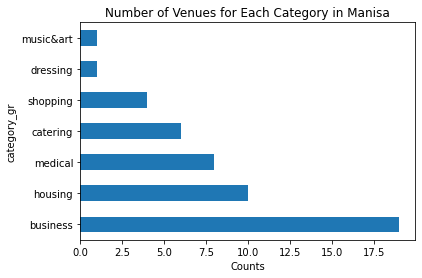

In [38]:
man_cat_gr_sorted['category_gr_num'].plot(kind='barh')
plt.title('Number of Venues for Each Category in Manisa')
plt.xlabel('Counts')
plt.show()

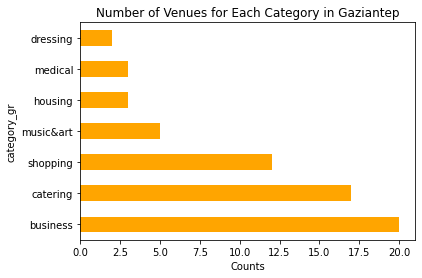

In [39]:
gzt_cat_gr_sorted['category_gr_num'].plot(kind='barh', color='orange')
plt.title('Number of Venues for Each Category in Gaziantep')
plt.xlabel('Counts')
plt.show()

It is quite obvious from the above charts that two cities differ from each other in some manner.

We can compare venue category group counts of both cities in the same table as follows.

In [40]:
man_count_df=man_cat_gr_sorted.drop(columns=['name', 'address','latitude','longitude','category_name','venue_category'])
gzt_count_df=gzt_cat_gr_sorted.drop(columns=['name', 'address','latitude','longitude','category_name','venue_category'])
merged_df=pd.concat([man_count_df, gzt_count_df],axis=1, ignore_index=True)
merged_df.rename(columns = {0:'Manisa',1:'Gaziantep'}, inplace = True)
merged_df                    

,Manisa,Gaziantep
business,19,20
housing,10,3
medical,8,3
catering,6,17
shopping,4,12
dressing,1,2
music&art,1,5


We can also represent this table in a chart as seen below.

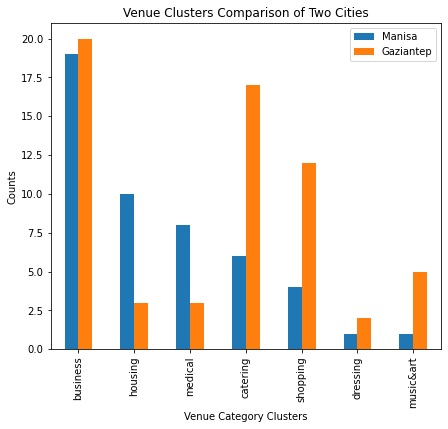

In [41]:
merged_df.plot(kind='bar', figsize=(7,6))
plt.title('Venue Clusters Comparison of Two Cities')
plt.ylabel('Counts')
plt.xlabel('Venue Category Clusters')
plt.show()

From the chart above:
1. It is clear that no city has superior to the other in terms of business venues category.
2. For the housing category, Manisa City has outnumbered the Gaziantep City.
3. For the catering, shopping and music-art venues category groups, Gaziantep City has an obvious superiority. This finding is important to indicate that consumption inclination seems to be quite higher in this city.


In this study, we examined how venues are spread within two cities. Moreover, similarities and differences of two cities are detected via both charts and visualization tools. Lastly, I hope that this analysis approach would help anyone who is interested in venues analysis and comparison of two or more places.

## End of the Project. Thank you for your consideration.